In [70]:
import numpy as np
import warnings 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D,AveragePooling2D,BatchNormalization,ZeroPadding2D,Add,Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import get_file
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('leaf')

leaf_types = os.listdir('leaf')
#print (room_types)  #what kinds of rooms are in this dataset

print("Types of leaves found: ", len(dataset_path))


Types of leaves found:  2


In [72]:

leaves = []

for item in leaf_types:
 # Get all the file names
 all_leaves = os.listdir('leaf' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for leaf in all_leaves:
    leaves.append((item, str('leaf' + '/' +item) + '/' + leaf))
    print(leaves[:1])



[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 'leaf/disease/images (10).jpeg')]
[('disease', 

In [73]:

# Build a dataframe
leaves_df = pd.DataFrame(data=leaves , columns=['leaves type', 'image'])

print(leaves_df.tail())


   leaves type                         image
95     healthy  leaf/healthy/images (6).jpeg
96     healthy  leaf/healthy/images (7).jpeg
97     healthy  leaf/healthy/images (8).jpeg
98     healthy  leaf/healthy/images (9).jpeg
99     healthy      leaf/healthy/images.jpeg


In [15]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(leaves_df))

leaves_count = leaves_df['leaves type'].value_counts()

#print("rooms in each category: ")
#print(room_count)



Total number of rooms in the dataset:  100


In [65]:

import cv2
path = 'leaf/'


im_size = 64

images = []
labels = []

for i in leaf_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)


In [18]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape

(100, 64, 64, 3)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=leaves_df['leaves type'].values
#print(y[:5])

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
#print (y)

y= y.reshape(-1,1)
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [0])  # one-hot encode the first column
    ],
    remainder='passthrough')
# fit transform
Y = ct.fit_transform(y)

print(Y.shape)

(100, 2)


In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.1, random_state=415)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(90, 64, 64, 3)
(90, 2)
(10, 64, 64, 3)
(10, 2)


In [2]:
#IDENTITY BLOCK
def identity_block(X, f, filters):
    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. We'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X




In [3]:
#CONVOLUTIONAL BLOCK
def convolutional_block(X,f,filters,s=2):
    F1, F2, F3 = filters
    X_shortcut = X

    X= Conv2D(filters= F1, kernel_size= (1,1), strides= (s,s))(X)
    X= BatchNormalization(axis= 3)(X)
    X= Activation('relu')(X)

    #Second layer
    X=Conv2D(filters= F2, kernel_size=(f,f), strides= (1,1), padding= 'same')(X)
    X= BatchNormalization(axis= 3)(X)
    X= Activation('relu')(X)

    #Third Layer
    X= Conv2D(filters= F3, kernel_size= (1,1), strides=(1,1), padding= 'valid')(X)
    X= BatchNormalization(axis= 3)(X)

    #short path
    X_shortcut= Conv2D(filters= F3, kernel_size=(1,1), strides=(s,s), padding='valid' )(X_shortcut)
    X_shortcut= BatchNormalization(axis= 3)(X_shortcut)

    X= Add()([X, X_shortcut])
    X= Activation('relu')(X)
    return X




In [4]:
#CREATING RESNET 50
def ResNet50(input_shape=(64, 64, 3), classes=2):
    X_input = Input(input_shape)

    # Zero Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2 (Convolutional Block)
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, f=3, filters=[64, 64, 256])
    X = identity_block(X, f=3, filters=[64, 64, 256])

    # Stage 3 (Convolutional Block)
    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, f=3, filters=[128, 128, 512])
    X = identity_block(X, f=3, filters=[128, 128, 512])
    X = identity_block(X, f=3, filters=[128, 128, 512])

    # Stage 4 (Convolutional Block)
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])
    X = identity_block(X, f=3, filters=[256, 256, 1024])

    # Stage 5 (Convolutional Block)
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, f=3, filters=[512, 512, 2048])
    X = identity_block(X, f=3, filters=[512, 512, 2048])

    # Average Pooling
    X = AveragePooling2D((2, 2))(X)

    # Output Layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', kernel_initializer=glorot_uniform(seed=0))(X)

    # Create Model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')
    return model







In [5]:
model = ResNet50(input_shape=(64, 64, 3), classes=2)

In [23]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'], run_eagerly=True)

In [8]:
model.summary()

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 70, 70, 3)         │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 32, 32, 64)        │           9,472 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 32, 32, 64)        │             256 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 32, 32, 64)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 15, 15, 64)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 15, 15, 64)        │           4,160 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 15, 15, 64)        │             256 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 15, 15, 64)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 15, 15, 64)        │          36,928 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 15, 15, 64)        │             256 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 15, 15, 64)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 15, 15, 256)       │          16,640 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 15, 15, 256)       │          16,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 15, 15, 256)       │           1,024 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │               

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 23,538,690 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [28]:
model.fit(train_x, train_y, epochs=20, batch_size=32 )

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 9.3905e-04
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0164
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0015
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0031
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 0.0010
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 3.1254e-04
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0035  
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 4.4157e-04
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 2.4344e-04
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 1.3114e-04
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 1.0000 - loss: 0.0017   
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 0.00

In [29]:
preds= model.evaluate(test_x, test_y)
print("Loss= "+ str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5000 - loss: 5.0700
Loss= 5.070037841796875
Test Accuracy = 0.5


input image shape (1, 64, 64, 3)


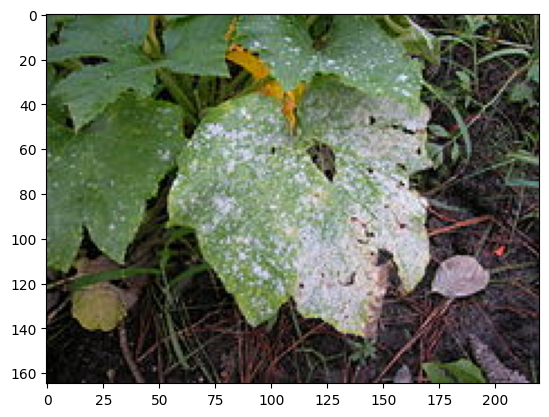

In [68]:
from matplotlib.pyplot import imread
from keras.preprocessing import image
import numpy as np 
img_path= 'test 5.jpeg'
img=image.load_img(img_path, target_size=(64,64))
X=image.img_to_array(img)
X= np.expand_dims(X, axis=0)
X=preprocess_input(X)
print("input image shape", X.shape)
my_image= imread(img_path)
imshow(my_image)

In [69]:
print(model.predict(X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[0.70183635 0.29816365]]
